In [2]:
class englishCorpusUtils:
    
    def __init__(self, corpusFile = '/media/elbially/01D1AAB2BBFDFB60/Speech Experiments/englishCorpus.txt'):
        self.corpusFile = corpusFile
        
    def ReadCorpus(self):
        
        import numpy as np

        corpus = []
        
        for i in open (self.corpusFile):
            tmp = i.split('\n')[0]
            if not (tmp == ''):
                corpus.append(tmp)
                
        self.corpus = np.array(corpus)
        
    def GenerateCorpus(self, numWords, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        corpusIndx = np.arange(self.corpus.shape[0]) #generate array from 0:length(corpus)-1
        reapeatedIndx = np.repeat(corpusIndx,numRepeate) #Repeate the indecis 
        np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
        numSentences = reapeatedIndx.shape[0]/numWords
        arrayOfIndx = np.array_split(reapeatedIndx,numSentences)

        f = open(fileName, "w")
        for i in xrange(0,numSentences):
            sent = self.corpus[arrayOfIndx[i]]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
            f.write(sent + '\n' + '\r\n')
            print sent
        f.close()

        if pltFlag is True :
            hist, bins = np.histogram(reapeatedIndx, bins=corpusIndx+1)
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:]) / 2
            plt.bar(center, hist, align='center', width=width)
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, transparent=True, bbox_inches="tight",dpi = 1000)
            
    def GenerateCorpusBetter(self, numWords, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        import pandas
        from collections import Counter

        listOfWords = self.randomize_carefully(self.corpus.tolist(),numRepeate)
        arrayOfWords = np.array(listOfWords)
        numSentences = arrayOfWords.shape[0]/numWords
        arrayOfSentences= np.array_split(arrayOfWords,numSentences)
    
        f = open(fileName,"w")
        for i in xrange(0,numSentences):
            sent = arrayOfSentences[i]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
            f.write(sent + '\n' + '\r\n')
            print sent
        f.close()   
        
        if pltFlag is True :
            word_counts = Counter(listOfWords)
            df = pandas.DataFrame.from_dict(word_counts, orient='index')
            ax = df.plot(kind='bar') 
            fig = ax.get_figure()
            fig.savefig(saveDir, dpi = 1000)
    
    def randomize_carefully(self,words, n_repeat=10):
        import random
        s = set(words)
        res = []
        for n in range(n_repeat):
            if res:
                # Avoid the last placed element
                lst = list(s.difference({res[-1]}))
                # Shuffle
                random.shuffle(lst)
                lst.append(res[-1])
                # Shuffle once more to avoid obvious repeating patterns in the last position
                lst[1:] = random.sample(lst[1:], len(lst)-1)
            else:
                lst = words[:]
                random.shuffle(lst)
            res.extend(lst)
        return res  
    
    
    def GenerateWords(self, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        corpusIndx = np.arange(self.corpus.shape[0]) #generate array from 0:length(corpus)-1
        reapeatedIndx = np.repeat(corpusIndx,numRepeate) #Repeate the indecis 
        np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
        
        f = open(fileName, "w")
        for i in xrange(0,reapeatedIndx.size):
            sent = self.corpus[reapeatedIndx[i]]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + sent
            f.write(sent + '\n' + '\r\n')
            print sent
        f.close()

        if pltFlag is True :
            hist, bins = np.histogram(reapeatedIndx, bins=corpusIndx+1)
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:]) / 2
            plt.bar(center, hist, align='center', width=width)
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, transparent=True, bbox_inches="tight",dpi = 1000)
            
    def GenerateWordsBetter(self,numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        import pandas
        from collections import Counter
        
        listOfWords = self.randomize_carefully(self.corpus.tolist(),numRepeate)
    
        f = open(fileName,"w")
        for i in xrange(0,len(listOfWords)):
            sent = '%03d' % (i+1) + '. ' + listOfWords[i]
            f.write(sent + '\n' + '\r\n')
            print sent
        f.close()   
        
        if pltFlag is True :
            word_counts = Counter(listOfWords)
            df = pandas.DataFrame.from_dict(word_counts, orient='index')
            ax = df.plot(kind='bar') 
            fig = ax.get_figure()
            fig.savefig(saveDir, dpi = 1000)
        
        
    def CalculateEditDistance(self,pltFlag = True,saveDir = 'EditDistance.png'):
        
        import matplotlib.pyplot as plt
        import numpy as np
        import editdist
        from Levenshtein import distance
        %matplotlib inline
        
        dist = np.empty((self.corpus.shape[0],self.corpus.shape[0]))
        for i in xrange(0,self.corpus.shape[0]):
            for j in xrange (0,self.corpus.shape[0]):
                dist[i][j] =  distance(self.corpus[i],self.corpus[j])
        
        self.editDistance = dist
        
        if pltFlag is True :
            plt.imshow(dist, interpolation='nearest')
            plt.xticks(np.arange(0,self.corpus.shape[0]), self.corpus,rotation=90)
            plt.yticks(np.arange(0,self.corpus.shape[0]), self.corpus)
            plt.colorbar()
            plt.title("Edit distance matrix")
            plt.tight_layout()
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, bbox_inches="tight",dpi = 1000)
            
    def histogramOfLetters(self, saveDir = 'lettersCounter.png'):
    
        import pandas
        import numpy as np
        from collections import Counter
        
        corpusList = self.corpus
        corpusList.tolist()
        letters = list(''.join(corpusList))
        #print ''.join(set(letters))
        letter_counts = Counter(letters)
    
        df = pandas.DataFrame.from_dict(letter_counts, orient='index')
        ax = df.plot(kind='bar') 
        fig = ax.get_figure()
        fig.savefig(saveDir, dpi = 1000)
    
    def histogramOfPhonemes(self, saveDir = 'lettersCounter.png'):  
        
        import nltk
        arpabet = nltk.corpus.cmudict.dict()

        for word in self.corpus:
            try:
                print arpabet[word][0]
            except Exception as e:
                print e

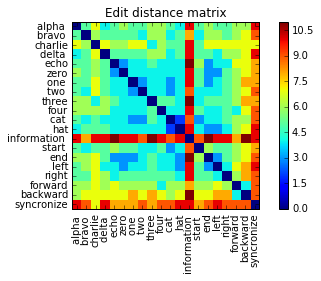

In [3]:
util = englishCorpusUtils(corpusFile = '/media/elbially/01D1AAB2BBFDFB60/Speech Experiments/testCorpus1.txt')
util.ReadCorpus()
util.CalculateEditDistance()
#util.histogramOfLetters()
#util.histogramOfPhonemes()
#util.GenerateWords(7,'./S01/Training/CorpusTrain_S01.txt',False)
#util.GenerateCorpus (4,7,'./S01/Training/CorpusTrain_S01.txt',False)
#util.GenerateCorpus (4,7,'./S02/Training/CorpusTrain_S02.txt',False)
#util.GenerateCorpus (4,7,'./S03/Training/CorpusTrain_S03.txt',False)
#util.GenerateCorpus (4,7,'./S04/Training/CorpusTrain_S04.txt',False)
#util.GenerateCorpus (4,7,'./S05/Training/CorpusTrain_S05.txt',False)
#util.GenerateCorpus (4,7,'./S06/Training/CorpusTrain_S06.txt',False)
#util.GenerateCorpus (4,7,'./S07/Training/CorpusTrain_S07.txt',False)
#util.GenerateCorpus (4,7,'./S08/Training/CorpusTrain_S08.txt',False)
#util.GenerateCorpus (4,7,'./S09/Training/CorpusTrain_S09.txt',False)
#util.GenerateCorpus (4,7,'./S10/Training/CorpusTrain_S10.txt',False)
#util.GenerateCorpus (4,3,'./S01/Testing/CorpusTest_S01.txt',False)
#util.GenerateCorpus (4,3,'./S02/Testing/CorpusTest_S02.txt',False)
#util.GenerateCorpus (4,3,'./S03/Testing/CorpusTest_S03.txt',False)
#util.GenerateCorpus (4,3,'./S04/Testing/CorpusTest_S04.txt',False)
#util.GenerateCorpus (4,3,'./S05/Testing/CorpusTest_S05.txt',False)
#util.GenerateCorpus (4,3,'./S06/Testing/CorpusTest_S06.txt',False)
#util.GenerateCorpus (4,3,'./S07/Testing/CorpusTest_S07.txt',False)
#util.GenerateCorpus (4,3,'./S08/Testing/CorpusTest_S08.txt',False)
#util.GenerateCorpus (4,3,'./S09/Testing/CorpusTest_S09.txt',False)
#util.GenerateCorpus (4,3,'./S10/Testing/CorpusTest_S10.txt',False)

In [7]:
util = englishCorpusUtils()
util.ReadCorpus()
#util.CalculateEditDistance()
#util.histogramOfLetters()
#util.histogramOfPhonemes()
#util.GenerateWordsBetter(20,'./S01/Training/CorpusTrain_S01.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S01/S01_Training/CorpusTrain_S01.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S02/S02_Training/CorpusTrain_S02.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S03/S03_Training/CorpusTrain_S03.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S04/S04_Training/CorpusTrain_S04.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S05/S05_Training/CorpusTrain_S05.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S06/S06_Training/CorpusTrain_S06.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S07/S07_Training/CorpusTrain_S07.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S08/S08_Training/CorpusTrain_S08.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S09/S09_Training/CorpusTrain_S09.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S10/S10_Training/CorpusTrain_S10.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S11/S11_Training/CorpusTrain_S11.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S12/S12_Training/CorpusTrain_S12.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S13/S13_Training/CorpusTrain_S13.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S14/S14_Training/CorpusTrain_S14.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S15/S15_Training/CorpusTrain_S15.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S16/S16_Training/CorpusTrain_S16.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S17/S17_Training/CorpusTrain_S17.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S18/S18_Training/CorpusTrain_S18.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S19/S19_Training/CorpusTrain_S19.txt',False)
util.GenerateCorpusBetter (4,20,'./EnglishExperiment/S20/S20_Training/CorpusTrain_S20.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S01/S01_Testing/CorpusTest_S01.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S02/S02_Testing/CorpusTest_S02.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S03/S03_Testing/CorpusTest_S03.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S04/S04_Testing/CorpusTest_S04.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S05/S05_Testing/CorpusTest_S05.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S06/S06_Testing/CorpusTest_S06.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S07/S07_Testing/CorpusTest_S07.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S08/S08_Testing/CorpusTest_S08.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S09/S09_Testing/CorpusTest_S09.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S10/S10_Testing/CorpusTest_S10.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S11/S11_Testing/CorpusTest_S11.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S12/S12_Testing/CorpusTest_S12.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S13/S13_Testing/CorpusTest_S13.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S14/S14_Testing/CorpusTest_S14.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S15/S15_Testing/CorpusTest_S15.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S16/S16_Testing/CorpusTest_S16.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S17/S17_Testing/CorpusTest_S17.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S18/S18_Testing/CorpusTest_S18.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S19/S19_Testing/CorpusTest_S19.txt',False)
util.GenerateCorpusBetter (4,10,'./EnglishExperiment/S20/S20_Testing/CorpusTest_S20.txt',False)

001. cat  four echo right
002. two  start  one  end
003. three hat zero bravo 
004. information  delta  synchronize left
005. backward forward charlie alpha 
006. backward start  information  forward
007. two  end zero four
008. left alpha  hat one 
009. right three cat  charlie
010. delta  echo bravo  synchronize
011. start  two  synchronize echo
012. charlie forward information  end
013. right backward three left
014. delta  one  bravo  cat 
015. hat four zero alpha 
016. two  echo backward synchronize
017. charlie right end hat
018. forward zero delta  three
019. left start  information  bravo 
020. cat  alpha  four one 
021. start  alpha  backward four
022. three synchronize cat  delta 
023. right forward charlie one 
024. left zero echo end
025. hat information  two  bravo 
026. left start  charlie two 
027. zero cat  end one 
028. bravo  information  three four
029. echo forward delta  backward
030. hat alpha  right synchronize
031. start  alpha  zero bravo 
032. charlie cat  two

In [8]:
util = englishCorpusUtils()
util.ReadCorpus()
util.GenerateCorpusBetter (4,20,'./TestSubject/Training/CorpusTrain_TestSubject.txt',False)
util.GenerateCorpusBetter (4,10,'./TestSubject/Testing/CorpusTrain_TestSubject.txt',False)

001. cat  synchronize delta  end
002. start  three left bravo 
003. one  two  hat four
004. backward right alpha  echo
005. forward charlie zero information 
006. cat  bravo  information  charlie
007. one  zero alpha  hat
008. right forward delta  end
009. four start  three echo
010. synchronize left backward two 
011. delta  end echo zero
012. one  start  four two 
013. forward three alpha  hat
014. charlie synchronize information  left
015. bravo  right backward cat 
016. charlie echo left right
017. one  backward delta  forward
018. three synchronize cat  four
019. information  alpha  bravo  hat
020. end zero start  two 
021. three forward charlie delta 
022. zero right backward end
023. bravo  echo information  alpha 
024. four left synchronize start 
025. two  cat  hat one 
026. backward alpha  hat cat 
027. bravo  synchronize forward four
028. echo start  end two 
029. delta  one  charlie left
030. three zero right information 
031. four delta  start  end
032. synchronize one  in